# Data Project - Stock Market Analysis 

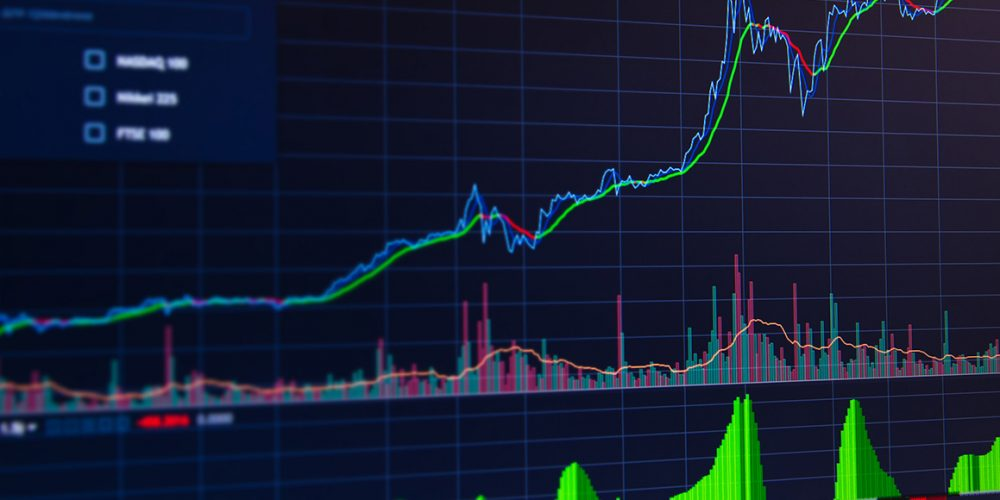

Time Series data is a series of data points indexed in time order. Time series data is everywhere, so manipulating them is important for any data analyst or data scientist.

In this notebook, we will discover and explore data from the stock market, particularly some technology stocks (Apple, Amazon, Google, and Microsoft). We will learn how to use yfinance to get stock information, and visualize different aspects of it using Seaborn and Matplotlib. we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks'?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)

***   

## Getting the Data
The first step is to get the data and load it to memory. We will get our stock data from the Yahoo Finance website. Yahoo Finance is a rich resource of financial market data and tools to find compelling investments. To get the data from Yahoo Finance, we will be using yfinance library which offers a threaded and Pythonic way to download market data from Yahoo. Check this article to learn more about yfinance: [Reliably download historical market data from with Python](https://aroussi.com/post/python-yahoo-finance)

# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [1]:
!pip install -q yfinance

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

#yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

/tmp/ipykernel_13/1776822768.py:31: FutureWarning: YF.download() has changed argument auto_adjust default to True
  globals()[stock] = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_13/1776822768.py:31: FutureWarning: YF.download() has changed argument auto_adjust default to True
  globals()[stock] = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_13/1776822768.py:31: FutureWarning: YF.download() has changed argument auto_adjust default to True
  globals()[stock] = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_13/1776822768.py:31: FutureWarning: YF.download() has changed argument auto_adjust default to True
  globals()[stock] = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/fo

Price,Close,High,Low,Open,Volume,company_name,Close,High,Low,Open,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,GOOG,GOOG,GOOG,GOOG,...,MSFT,MSFT,MSFT,MSFT,MSFT,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,,,,,,,,,,,,,,,,,
2025-07-17,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,223.880005,224.500000,222.509995,223.320007,31855800.0
2025-07-18,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,226.130005,226.399994,222.979996,225.139999,37833800.0
2025-07-21,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,229.300003,229.690002,225.649994,225.839996,40297600.0
2025-07-22,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,227.470001,230.000000,226.350006,229.679993,37483700.0
2025-07-23,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,228.289993,228.789993,227.089996,228.470001,28294900.0
2025-07-24,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,232.229996,236.000000,228.639999,229.169998,42902300.0
2025-07-25,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,231.440002,232.479996,231.179993,232.220001,28712100.0
2025-07-28,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,232.789993,234.289993,232.250000,233.350006,26300100.0


Reviewing the content of our data, we can see that the data is numeric and the date is the index of the data. Notice also that weekends are missing from the records.

**Quick note:** Using `globals()` is a sloppy way of setting the `DataFrame` names, but it's simple. Now we have our data, let's perform some basic data analysis and check our data.

## Descriptive Statistics about the Data
`.describe()` generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding `NaN` values.

Analyzes both numeric and object series, as well as `DataFrame` column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [3]:
# Summary Stats
AAPL.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,221.614631,223.832727,219.031850,221.273588,5.308349e+07
std,15.821955,15.365936,16.126559,15.883347,2.740388e+07
min,172.194199,190.090729,168.988411,171.724805,2.323470e+07
25%,210.090004,212.394997,208.118551,210.200005,3.949305e+07
50%,222.897705,224.899456,220.554728,223.325554,4.640410e+07
75%,232.274689,233.708490,228.982346,231.917724,5.569950e+07
max,258.396667,259.474086,257.010028,257.568678,3.186799e+08


We have only 255 records in one year because weekends are not included in the data.

In [4]:
company.columns

MultiIndex([(       'Close', 'AMZN'),
            (        'High', 'AMZN'),
            (         'Low', 'AMZN'),
            (        'Open', 'AMZN'),
            (      'Volume', 'AMZN'),
            ('company_name',     '')],
           names=['Price', 'Ticker'])

## Information About the Data
`.info()` method prints information about a DataFrame including the index `dtype` and columns, non-null values, and memory usage.

In [5]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2024-07-30 to 2025-07-30
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, AAPL)     251 non-null    float64
 1   (High, AAPL)      251 non-null    float64
 2   (Low, AAPL)       251 non-null    float64
 3   (Open, AAPL)      251 non-null    float64
 4   (Volume, AAPL)    251 non-null    int64  
 5   (company_name, )  251 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 13.7+ KB


## Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

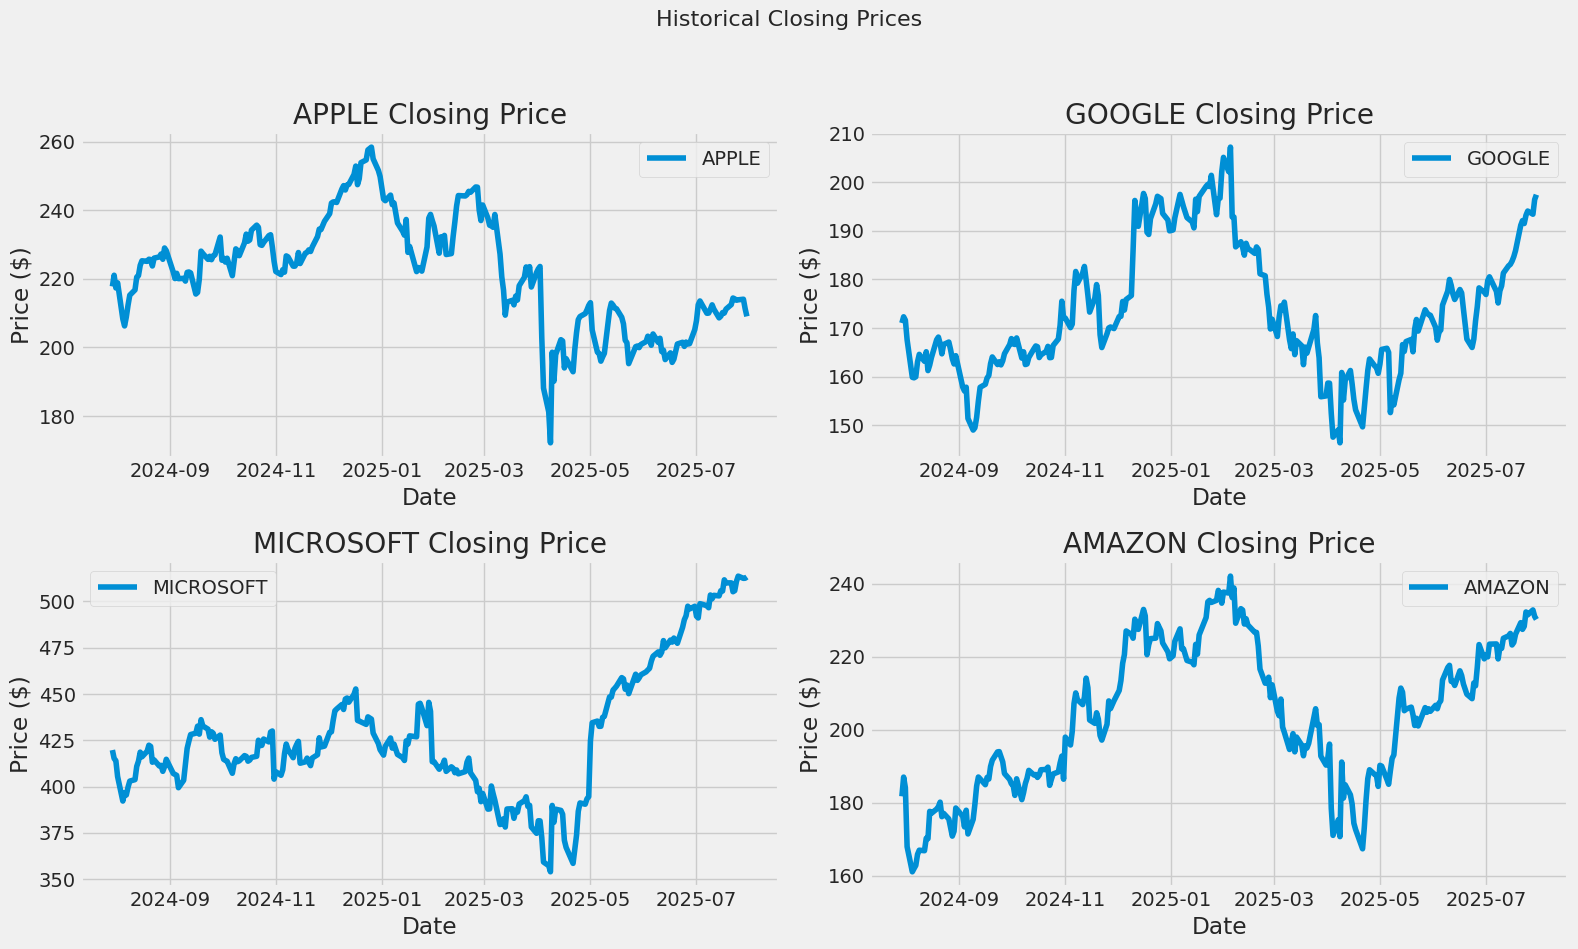

In [6]:
# Let's see a historical view of the closing price
fig, axs = plt.subplots(2, 2, figsize=(16, 10))  # Create 2x2 grid of subplots
fig.suptitle("Historical Closing Prices", fontsize=16)
axs = axs.flatten()  # Flatten to iterate easily

for i, (company, name) in enumerate(zip(company_list, company_name)):
    if not company.empty and 'Close' in company.columns:
        axs[i].plot(company.index, company['Close'], label=name)
        axs[i].set_title(f"{name} Closing Price")
        axs[i].set_xlabel("Date")
        axs[i].set_ylabel("Price ($)")
        axs[i].legend()
    else:
        axs[i].text(0.5, 0.5, f"No data for {name}", ha='center', va='center')
        axs[i].set_axis_off()  # Hide axis if no data

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust to not overlap with suptitle
plt.show()


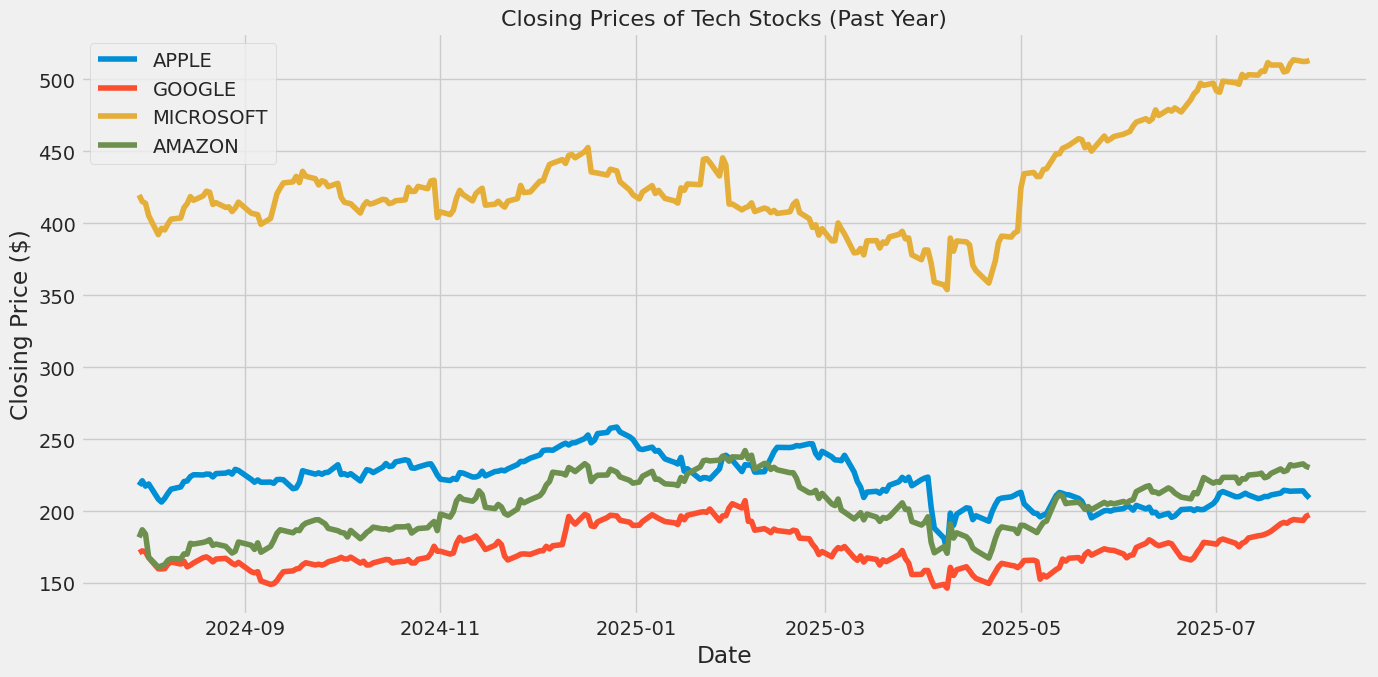

In [7]:
plt.figure(figsize=(14, 7))

# Plot each company's closing price
for company, name in zip(company_list, company_name):
    if not company.empty and 'Close' in company.columns:
        plt.plot(company.index, company['Close'], label=name)

# Formatting the plot
plt.title("Closing Prices of Tech Stocks (Past Year)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Closing Price ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

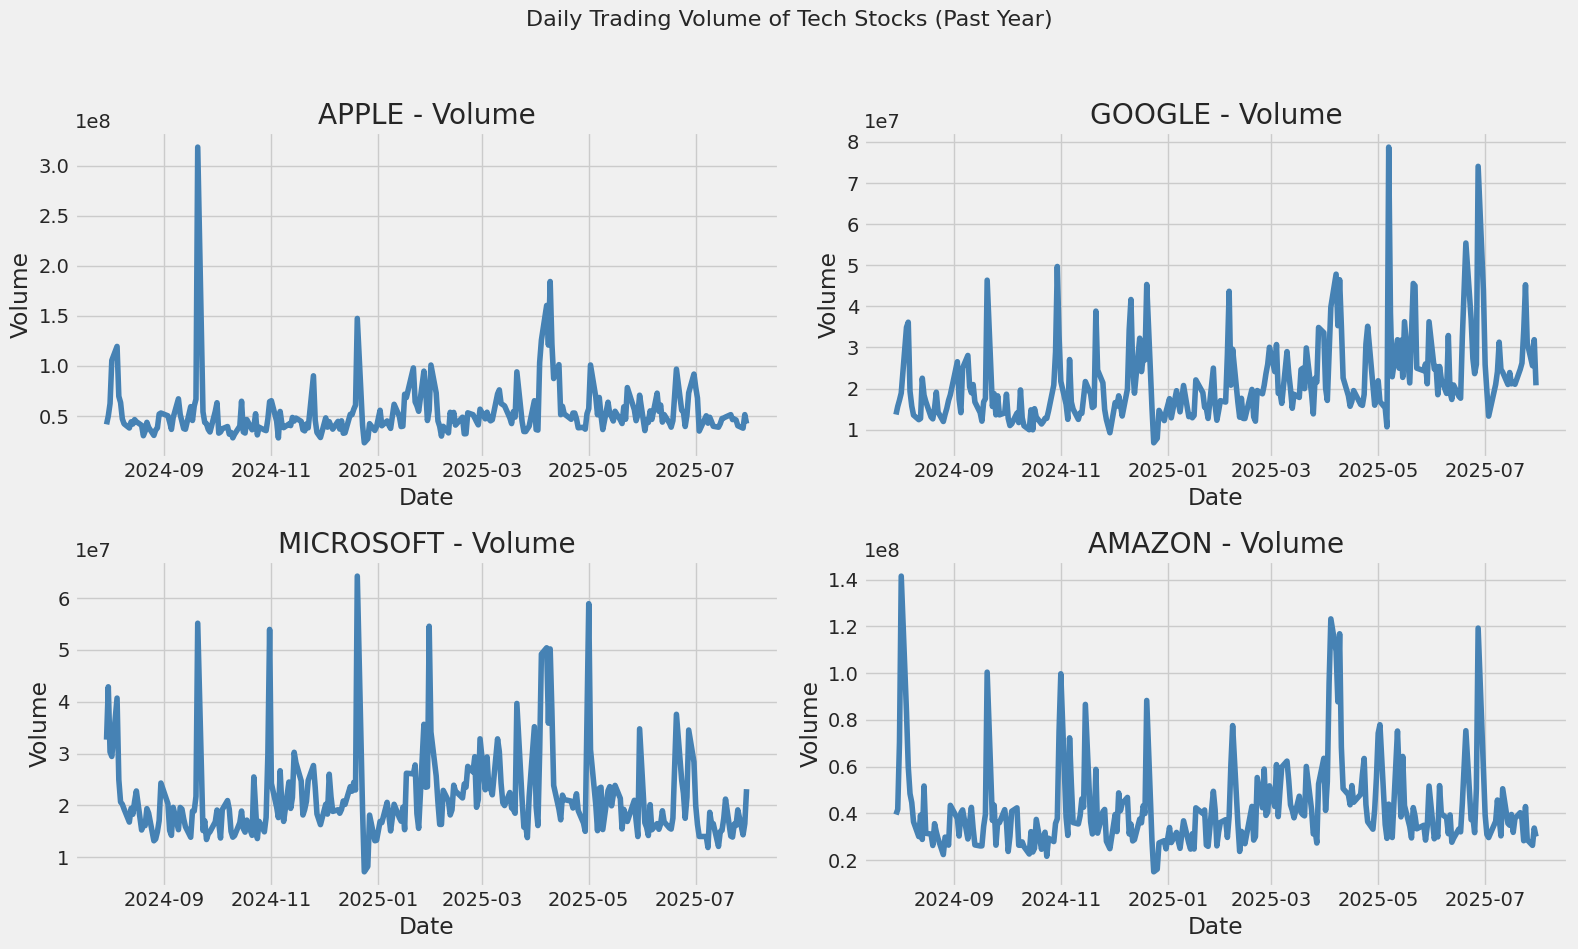

In [8]:
# Create 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle("Daily Trading Volume of Tech Stocks (Past Year)", fontsize=16)
axs = axs.flatten()

# Plot each company's volume
for i, (company, name) in enumerate(zip(company_list, company_name)):
    if not company.empty and 'Volume' in company.columns:
        axs[i].plot(company.index, company['Volume'], color='steelblue')
        axs[i].set_title(f"{name} - Volume")
        axs[i].set_xlabel("Date")
        axs[i].set_ylabel("Volume")
        axs[i].grid(True)
    else:
        axs[i].text(0.5, 0.5, f"No data for {name}", ha='center', va='center')
        axs[i].set_axis_off()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


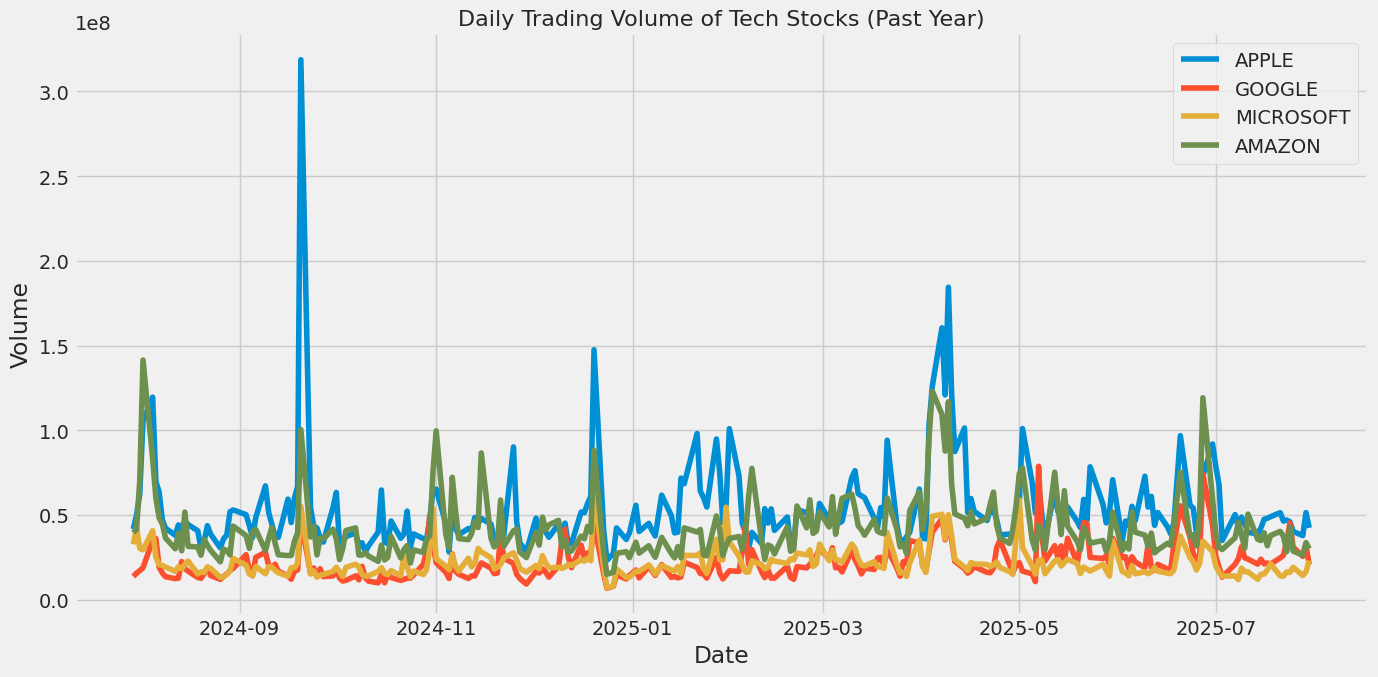

In [9]:
plt.figure(figsize=(14, 7))

# Plot each company's volume
for company, name in zip(company_list, company_name):
    if not company.empty and 'Volume' in company.columns:
        plt.plot(company.index, company['Volume'], label=name)

# Plot formatting
plt.title("Daily Trading Volume of Tech Stocks (Past Year)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. What was the moving average of the various stocks?

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

In [10]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download data
tickers = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
company_name = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON']
company_data = {}

# Step 1: Download data and calculate moving averages
for ticker in tickers:
    df = yf.download(ticker, period="1y")
    df['MA for 10 days'] = df['Close'].rolling(window=10).mean()
    df['MA for 20 days'] = df['Close'].rolling(window=20).mean()
    df['MA for 50 days'] = df['Close'].rolling(window=50).mean()
    company_data[ticker] = df

# Step 2: Plot all 4 lines (Close + 3 MAs)
# Define a soft and professional color palette
colors = {
    'Close': '#1f77b4',         # muted blue
    'MA for 10 days': '#2ca02c',  # soft green
    'MA for 20 days': '#ff7f0e',  # muted orange
    'MA for 50 days': '#9467bd'   # soft purple
}



/tmp/ipykernel_13/3580074274.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="1y")
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_13/3580074274.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="1y")
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_13/3580074274.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="1y")
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_13/3580074274.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="1y")
[*********************100%***********************]  1 of 1 completed


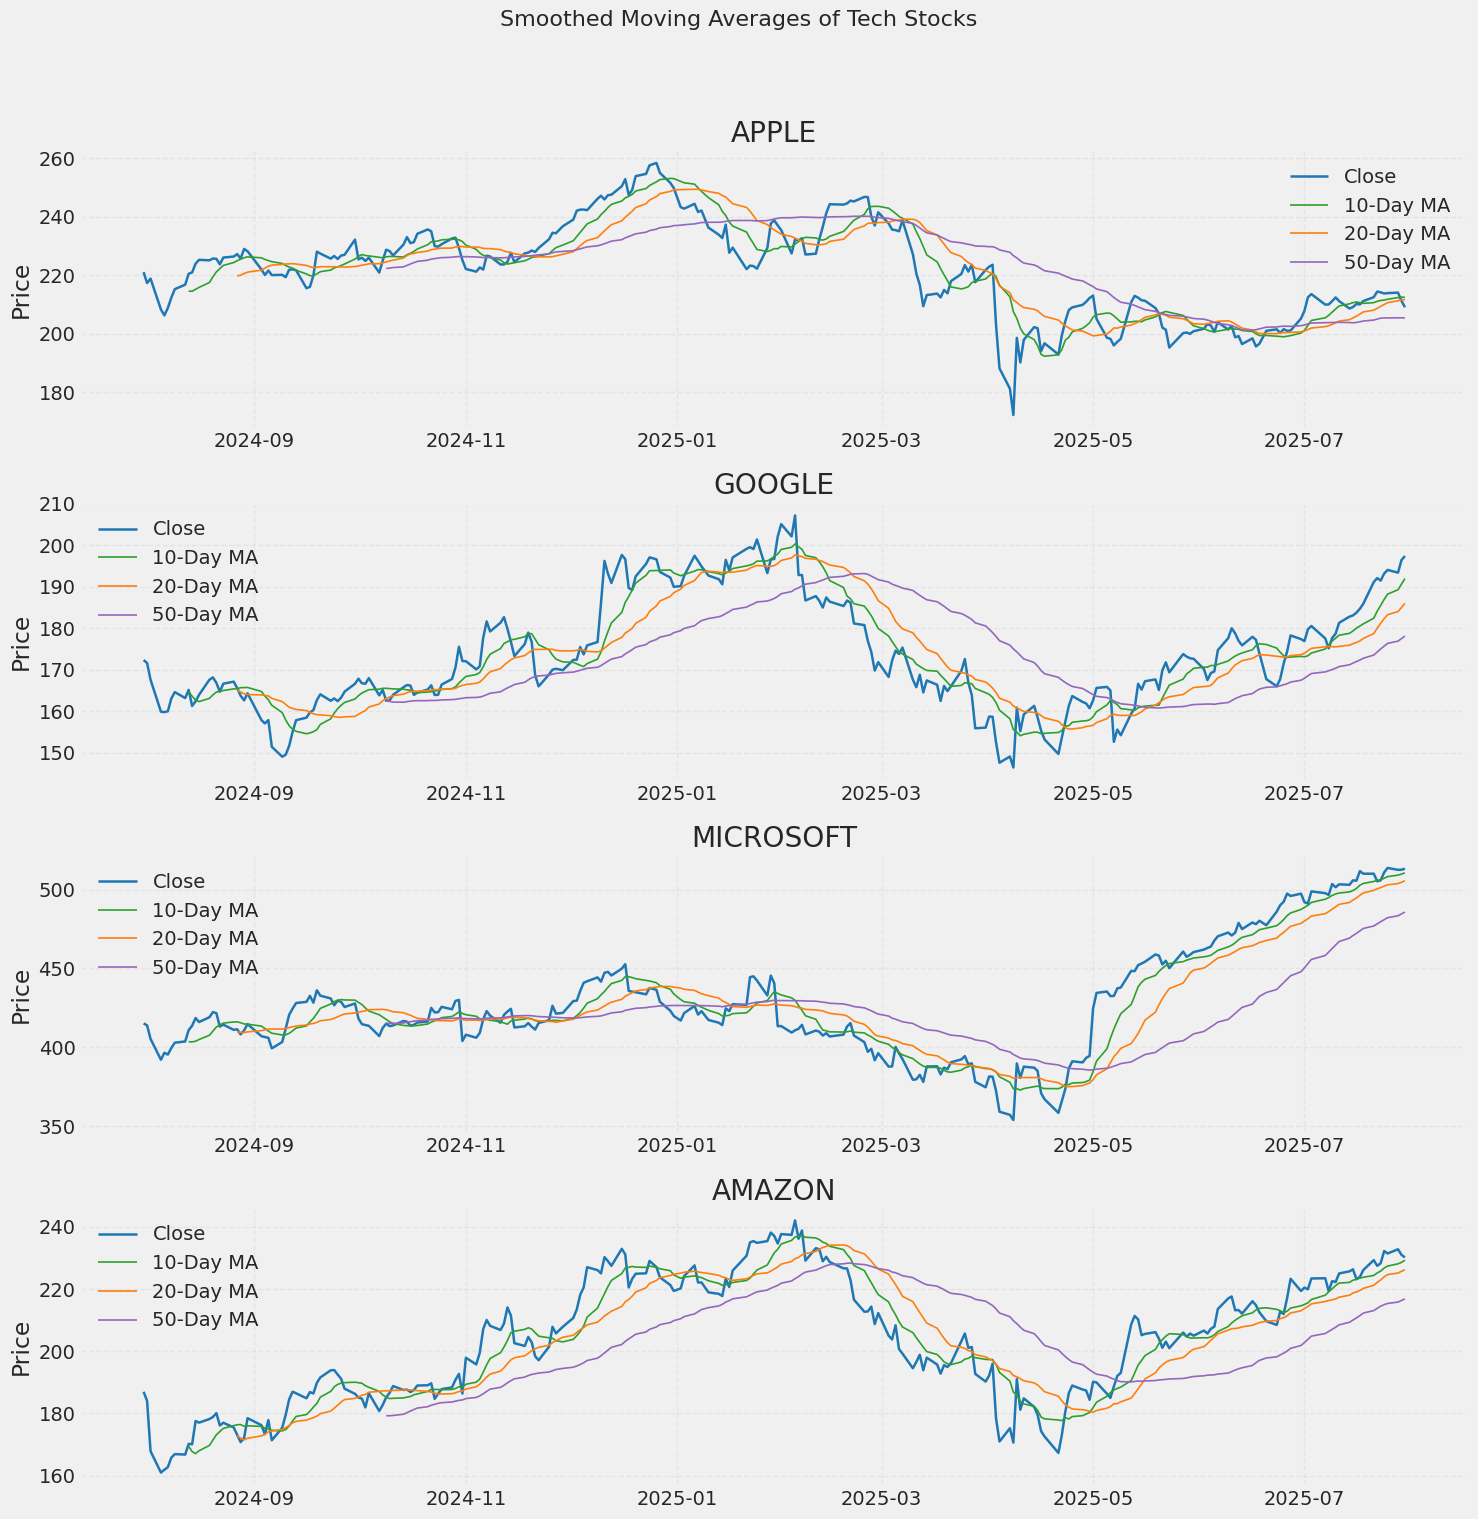

In [11]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 16))
fig.suptitle("Smoothed Moving Averages of Tech Stocks", fontsize=16)
axes = axes.flatten()

for i, ticker in enumerate(tickers):
    df = company_data[ticker]
    ax = axes[i]
    ax.set_title(company_name[i])
    ax.set_ylabel("Price")
    ax.grid(True, linestyle='--', alpha=0.3)

    # Plot with professional soft colors
    ax.plot(df.index, df['Close'], label='Close', color=colors['Close'], linewidth=1.8)
    ax.plot(df.index, df['MA for 10 days'], label='10-Day MA', color=colors['MA for 10 days'], linewidth=1.2)
    ax.plot(df.index, df['MA for 20 days'], label='20-Day MA', color=colors['MA for 20 days'], linewidth=1.2)
    ax.plot(df.index, df['MA for 50 days'], label='50-Day MA', color=colors['MA for 50 days'], linewidth=1.2)

    ax.legend(frameon=False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


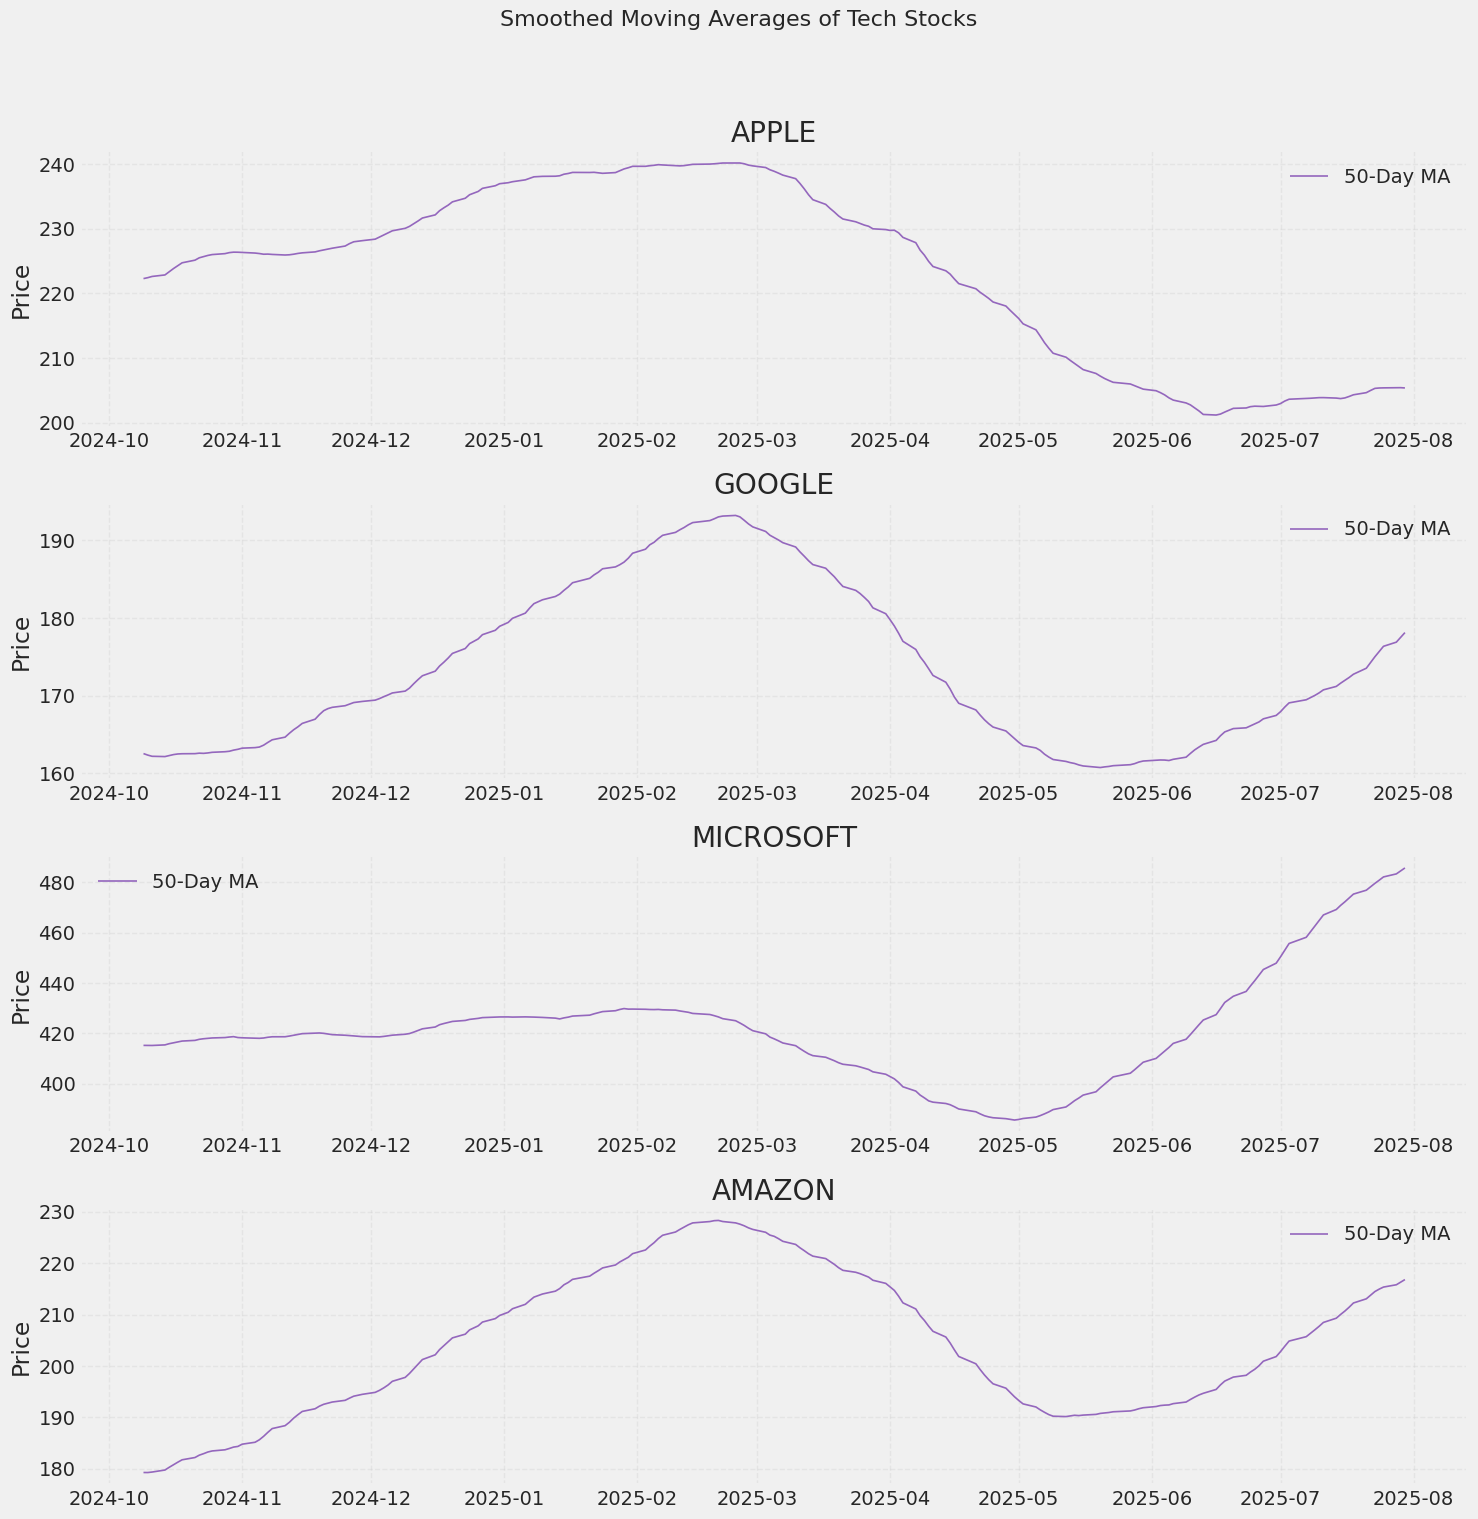

In [12]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 16))
fig.suptitle("Smoothed Moving Averages of Tech Stocks", fontsize=16)
axes = axes.flatten()

for i, ticker in enumerate(tickers):
    df = company_data[ticker]
    ax = axes[i]
    ax.set_title(company_name[i])
    ax.set_ylabel("Price")
    ax.grid(True, linestyle='--', alpha=0.3)

    # Plot with professional soft colors
    ax.plot(df.index, df['MA for 50 days'], label='50-Day MA', color=colors['MA for 50 days'], linewidth=1.2)

    ax.legend(frameon=False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

# 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

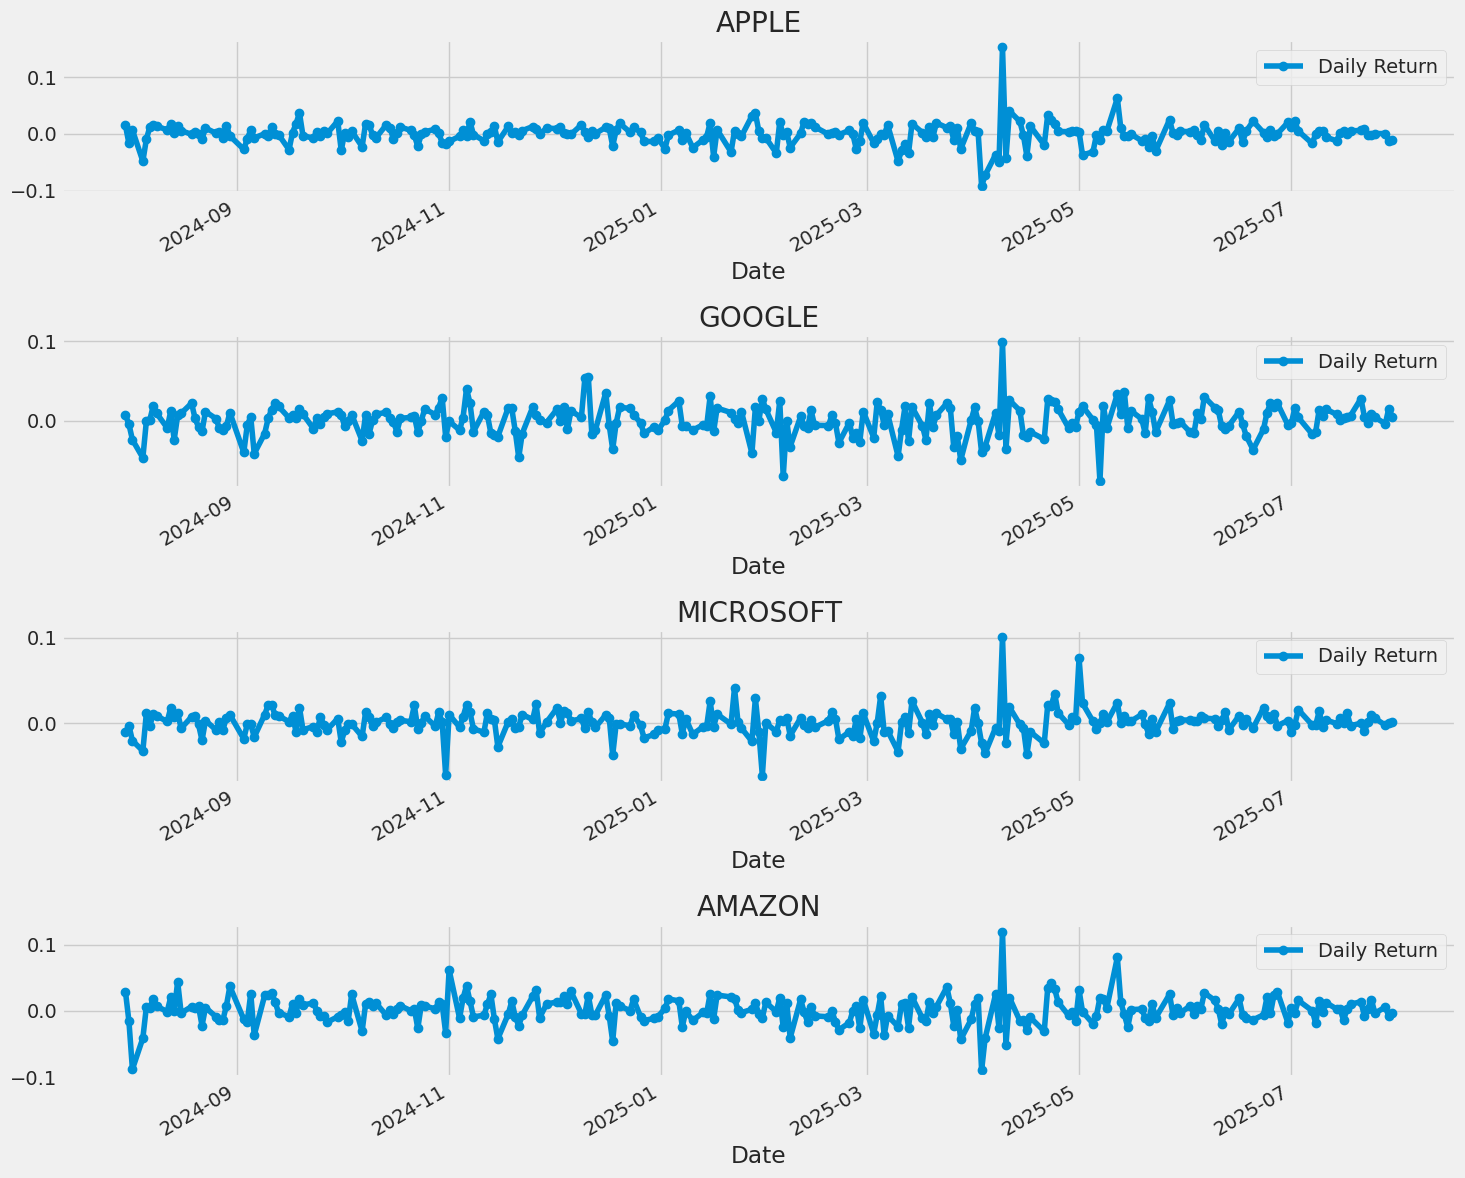

In [13]:
# Calculate daily returns
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

# Create 4 vertical subplots (1 column, 4 rows)
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))

# Plot each company's daily return
AAPL['Daily Return'].plot(ax=axes[0], legend=True, marker='o', title='APPLE')
GOOG['Daily Return'].plot(ax=axes[1], legend=True, marker='o', title='GOOGLE')
MSFT['Daily Return'].plot(ax=axes[2], legend=True, marker='o', title='MICROSOFT')
AMZN['Daily Return'].plot(ax=axes[3], legend=True, marker='o', title='AMAZON')

# Layout adjustment
plt.tight_layout()
plt.show()


Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

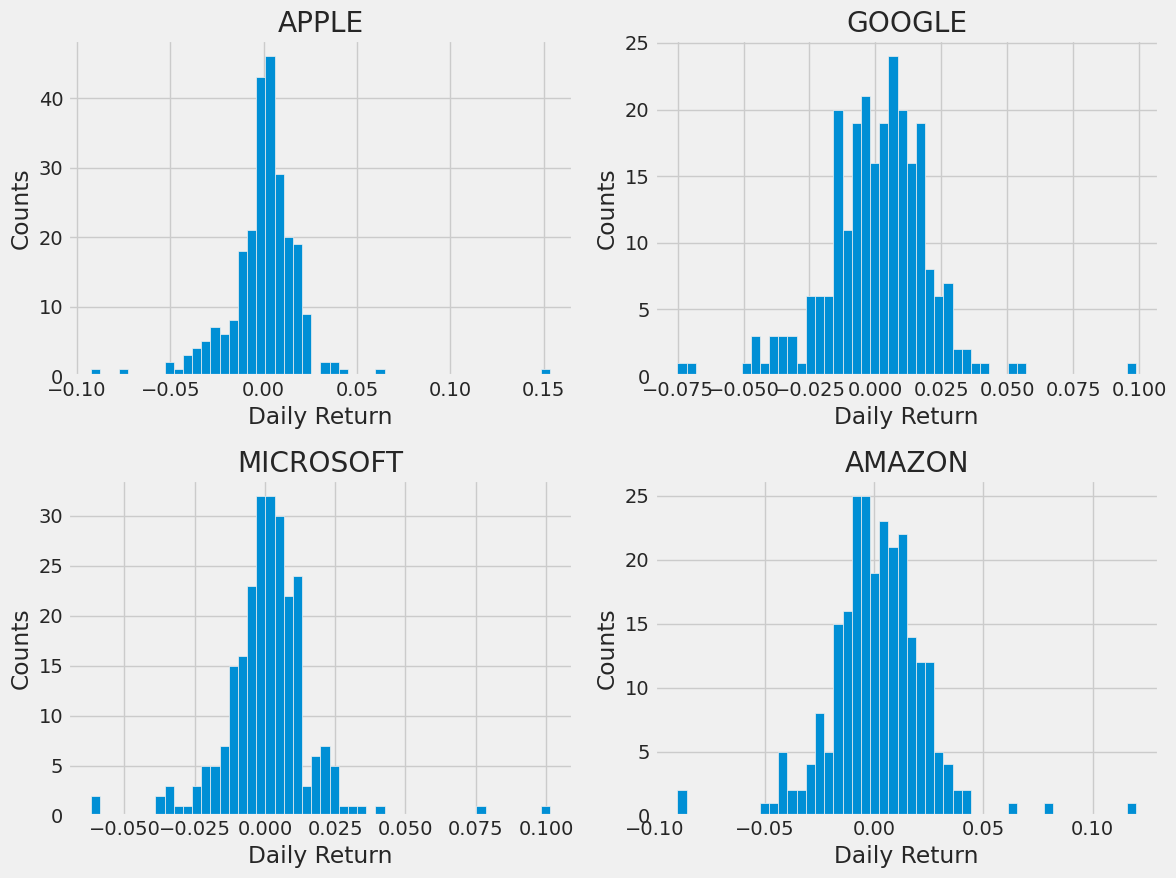

In [14]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

# 4. What was the correlation between different stocks closing prices?

Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [15]:
# Grab all the closing prices for the tech stock list into one DataFrame
import yfinance as yf

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
start = "2020-01-01"
end = "2024-12-31"

# Download close prices
closing_df = yf.download(tech_list, start=start, end=end)['Close']

# Calculate percent change
tech_rets = closing_df.pct_change()
tech_rets.head()


# closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Close']

# # Make a new tech returns DataFrame
# tech_rets = closing_df.pct_change()
# tech_rets.head()

/tmp/ipykernel_13/2161651872.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  closing_df = yf.download(tech_list, start=start, end=end)['Close']
[*********************100%***********************]  4 of 4 completed
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-0.009722,-0.012139,-0.004907,-0.012452
2020-01-06,0.007968,0.014886,0.024657,0.002585
2020-01-07,-0.004703,0.002092,-0.000624,-0.009118
2020-01-08,0.016086,-0.007809,0.007880,0.015928


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


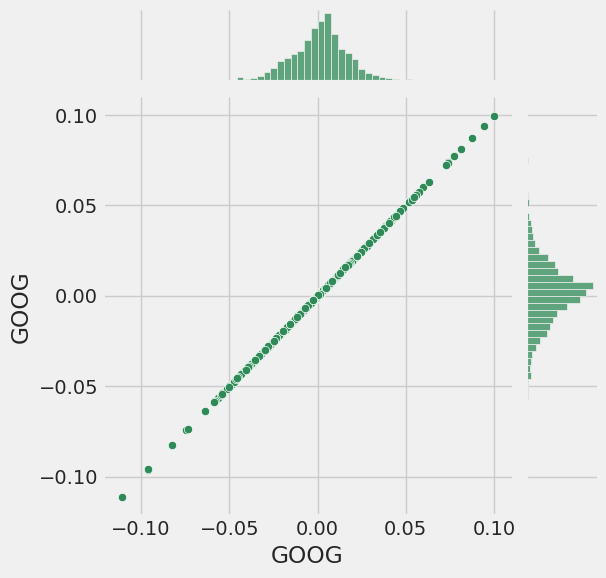

In [16]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


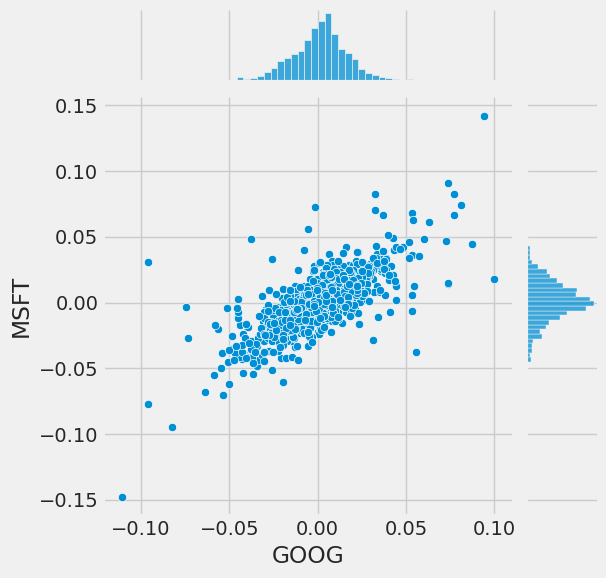

In [17]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

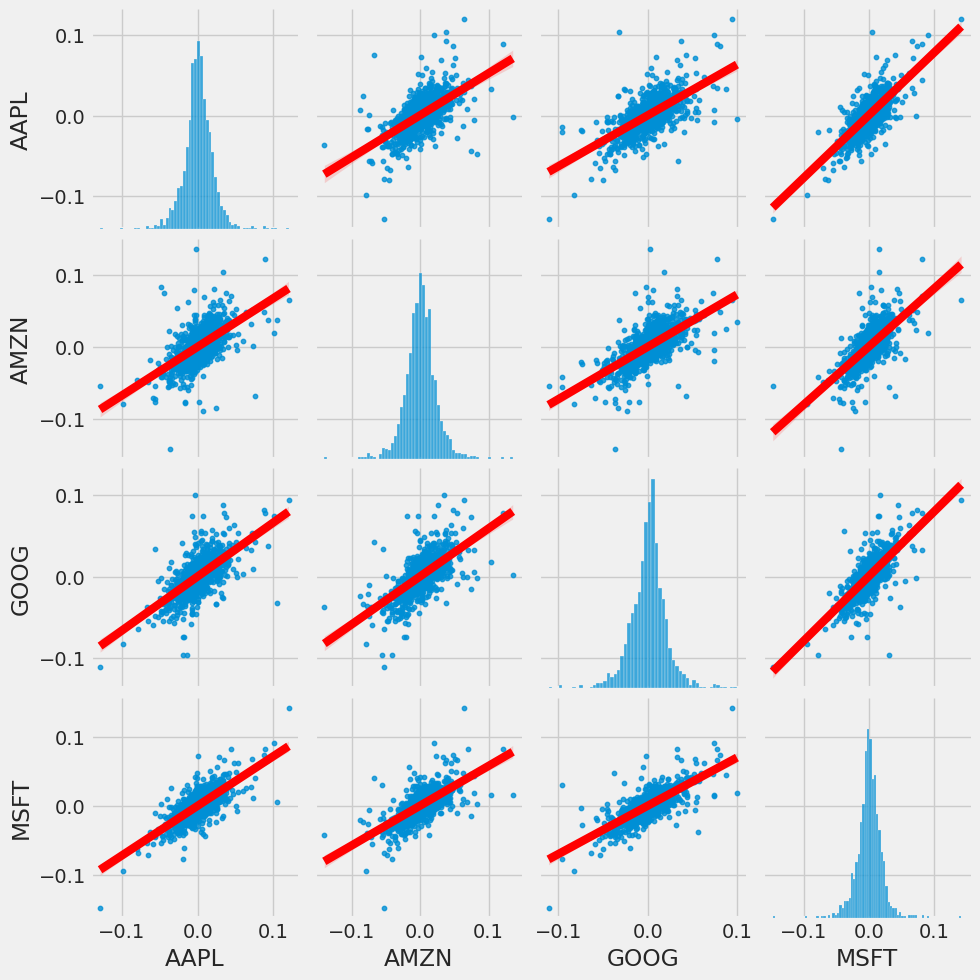

In [18]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

import seaborn as sns

sns.pairplot(tech_rets.dropna(), kind='reg', plot_kws={'line_kws': {'color': 'red'}, 'scatter_kws': {'s': 10}})


Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. 

While the simplicity of just calling `sns.pairplot()` is fantastic we can also use `sns.PairGrid()` for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

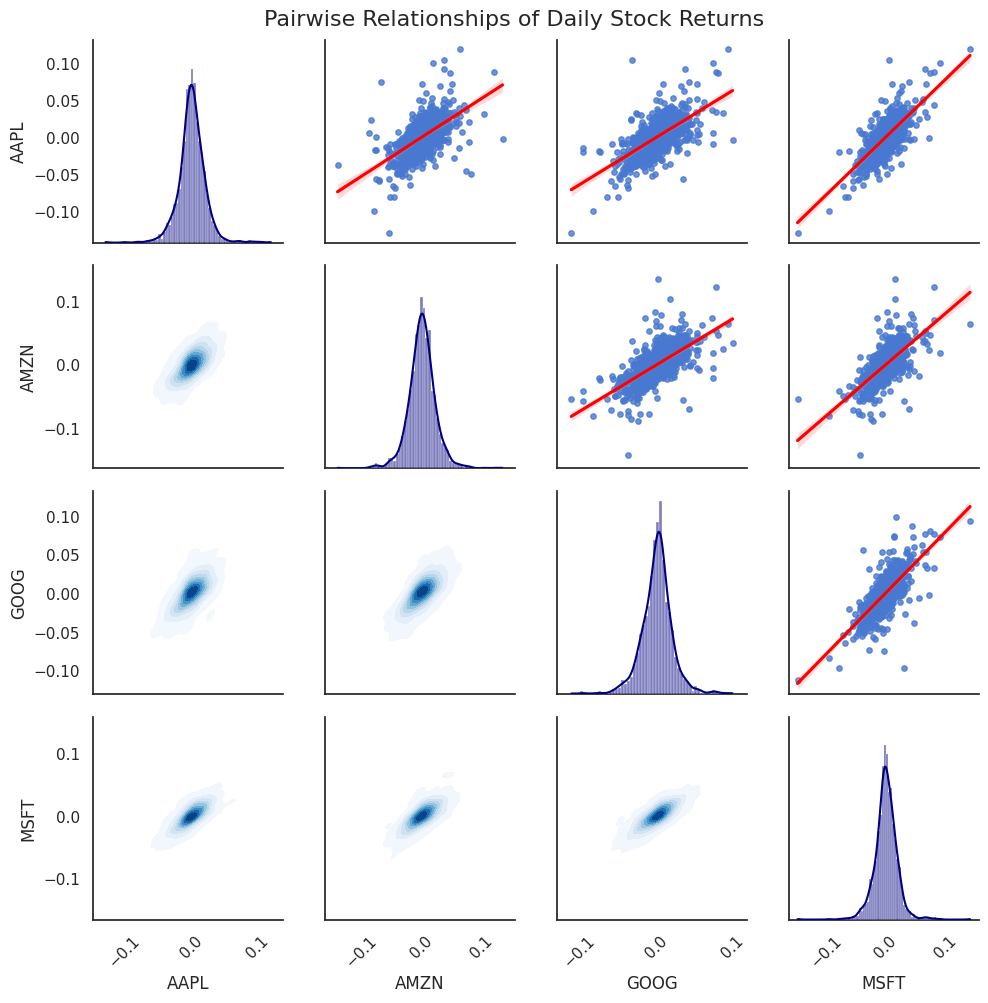

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clean NaNs just in case
clean_rets = tech_rets.dropna()

# Set seaborn style
sns.set(style="white", palette="muted")

# Create the PairGrid
returns_fig = sns.PairGrid(clean_rets)

# Upper triangle: add regression lines
returns_fig.map_upper(sns.regplot, scatter_kws={'s': 15}, line_kws={'color': 'red'})

# Lower triangle: KDE density plots
returns_fig.map_lower(sns.kdeplot, cmap="Blues", fill=True)

# Diagonal: Histogram + KDE
returns_fig.map_diag(sns.histplot, kde=True, color='navy')

# Add a title
plt.subplots_adjust(top=0.95)
returns_fig.fig.suptitle('Pairwise Relationships of Daily Stock Returns', fontsize=16)

# Improve layout
for ax in returns_fig.axes.flatten():
    if ax:
        ax.tick_params(axis='x', rotation=45)
        ax.tick_params(axis='y', rotation=0)

plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

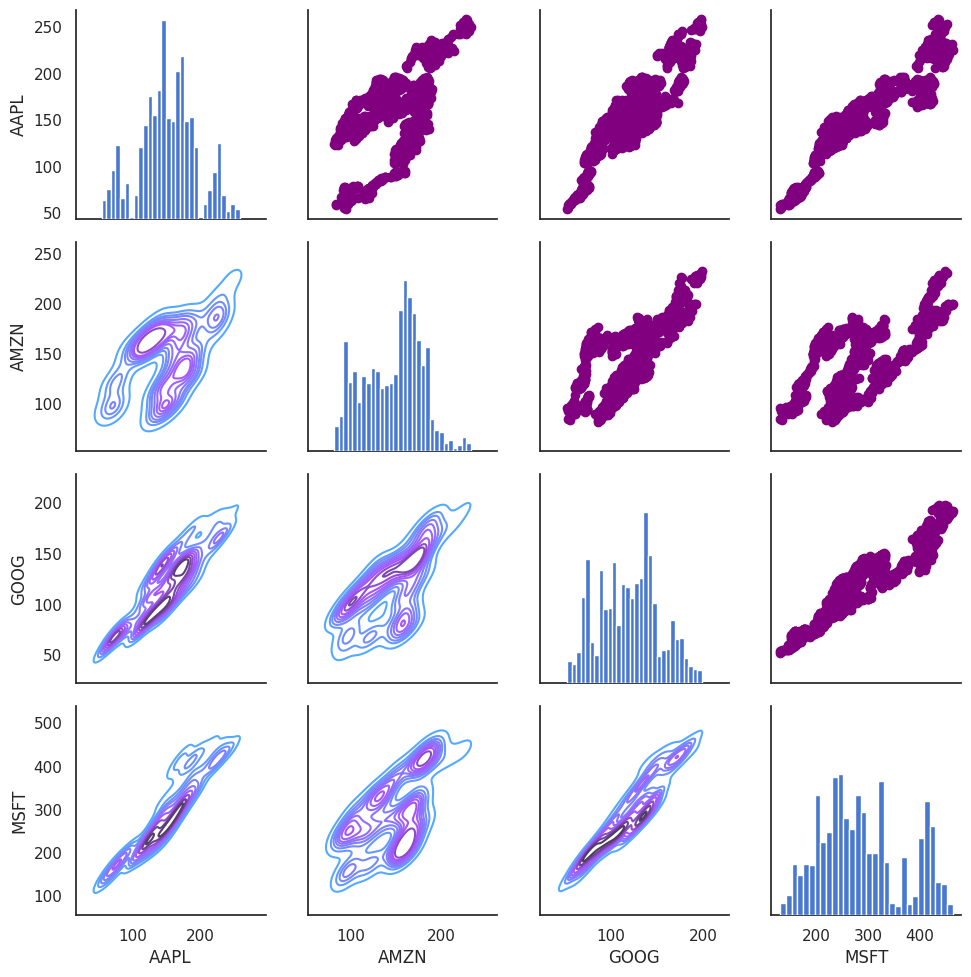

In [20]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

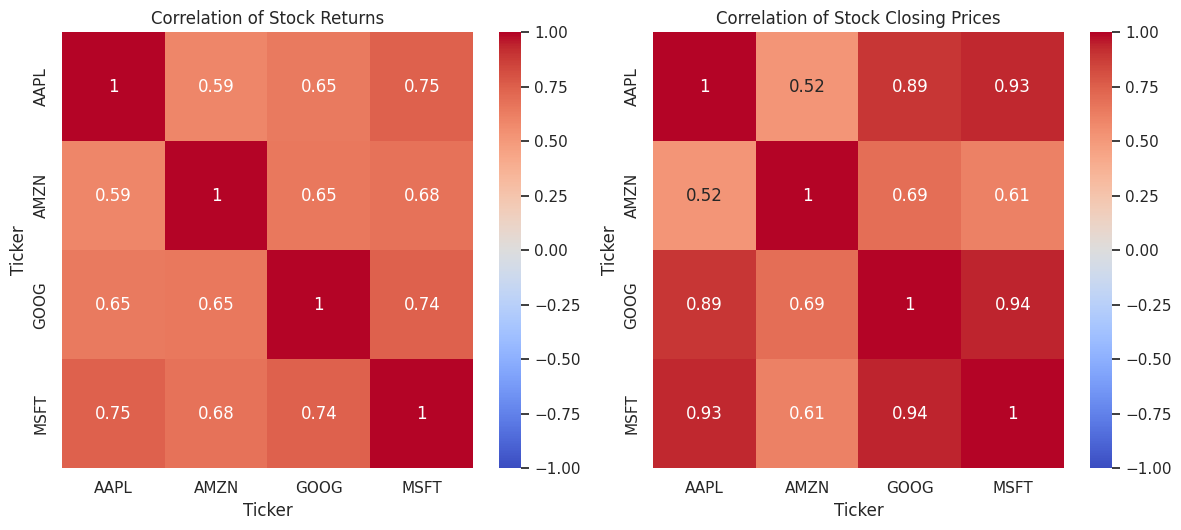

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))

# Heatmap for correlation of stock returns
plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Stock Returns')

# Heatmap for correlation of stock closing prices
plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Stock Closing Prices')

plt.tight_layout()
plt.show()


Just like we suspected in our `PairPlot` we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# 5. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

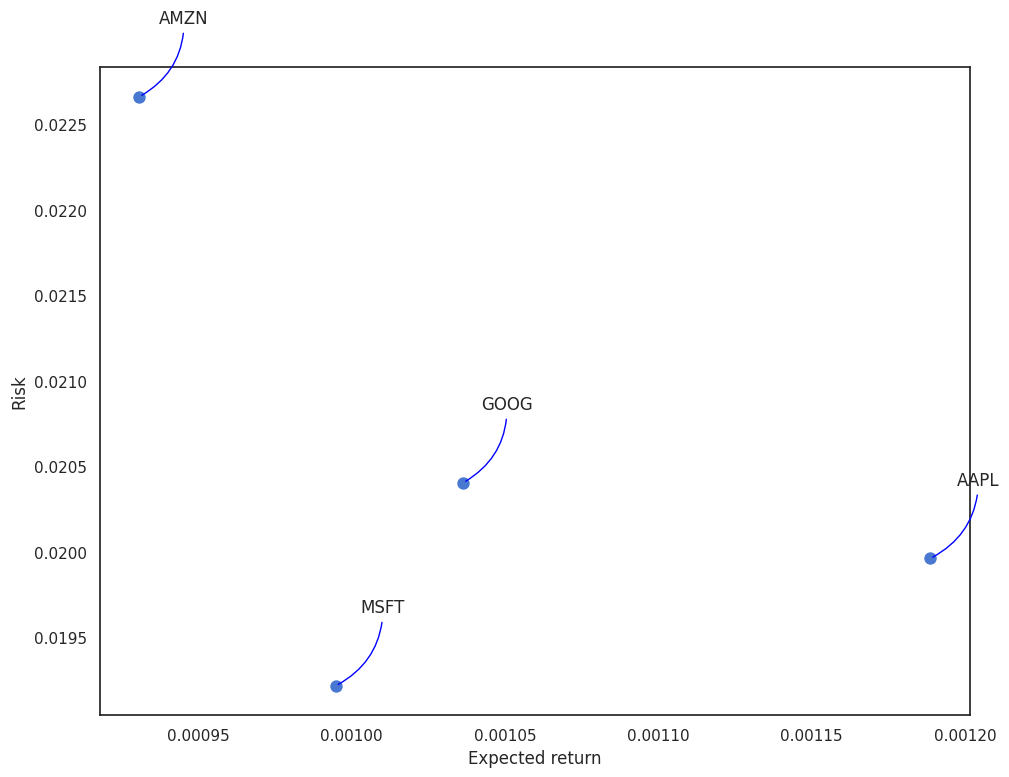

In [22]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))